<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/CNN_Lung_infection_prediction_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sri

# CNN Lung infection predieection by Srinivasa Raghavan P, Coding done for execution in Colab

# Create a Classification model that can predict whether the given image belongs to Healthy lung or type1 or type2 disease

# Import packages

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import data set

In [4]:
# Extracting the data
! unzip data_Lungs.zip

Archive:  data_Lungs.zip
replace __MACOSX/._data_Lungs? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._data_Lungs   
  inflating: data_Lungs/.DS_Store    
  inflating: __MACOSX/data_Lungs/._test  
  inflating: __MACOSX/data_Lungs/._train  
  inflating: __MACOSX/data_Lungs/test/._Type 1 disease  
  inflating: data_Lungs/test/.DS_Store  
  inflating: __MACOSX/data_Lungs/test/._healthy  
  inflating: __MACOSX/data_Lungs/test/._Type 2 disease  
  inflating: __MACOSX/data_Lungs/train/._Type 1 disease  
  inflating: data_Lungs/train/.DS_Store  
  inflating: __MACOSX/data_Lungs/train/._healthy  
  inflating: __MACOSX/data_Lungs/train/._Type 2 disease  
  inflating: data_Lungs/test/Type 1 disease/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg  
  inflating: data_Lungs/test/Type 1 disease/COVID-00012.jpg  
  inflating: data_Lungs/test/Type 1 disease/0105.png  
  inflating: data_Lungs/test/Type 1 disease/0111.jpg  
  inflating: data_Lungs/test/Type 1 disease/0112.jpg 

Image sample of Type1 disease lung



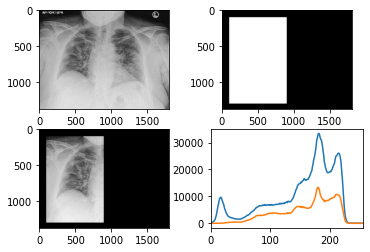

In [5]:
img = cv2.imread('data_Lungs/train/Type 1 disease/COVID-00013b.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:1300, 100:900] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
print("Image sample of Type1 disease lung\n")
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


Image sample of Type2 disease lung



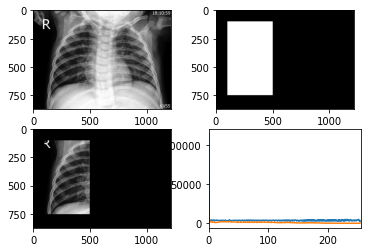

In [6]:
img = cv2.imread('data_Lungs/train/Type 2 disease/084.jpeg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:750, 100:500] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
print("Image sample of Type2 disease lung\n")
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

Image sample of Healthy lung



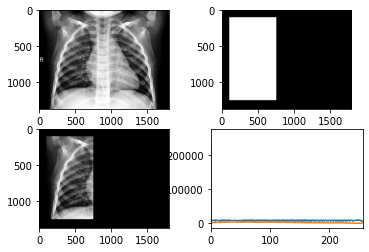

In [7]:
img = cv2.imread('data_Lungs/test/healthy/0114.jpeg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:1250, 100:750] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
print("Image sample of Healthy lung\n")
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

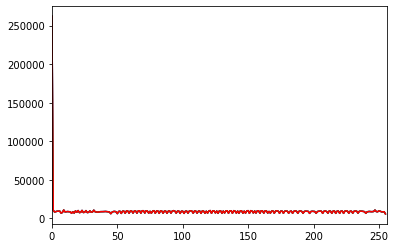

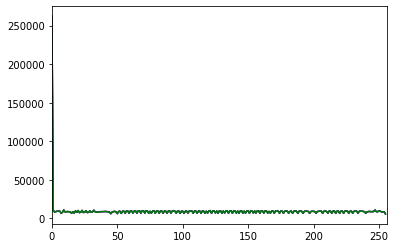

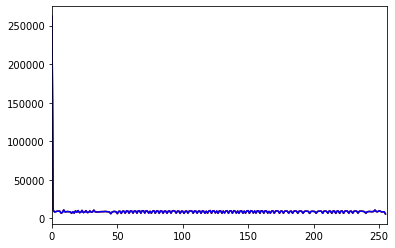

In [8]:
img_covid = cv2.imread('data_Lungs/test/healthy/0114.jpeg')
#img_covid = cv2.imread('donald_duck.jpeg')
#plt.hist(img_covid.ravel(),256,[0,256]); plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_covid],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
color = ('r','b','g')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_covid],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
color = ('g','r','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_covid],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

**Inference:** The data here shows that though the images are used as RGB (shape: 48,48,3), the images are just monochrome since the histogram of r,g,b are all the same, since the 3x colors just coincide with each other. Similar study was done for many images, one of the sample/reference is shown above. With this observation, data study will be done just w/ RGB instead of w/ grayscale

In [9]:
#tf.keras.preprocessing.image_dataset_from_directory(
#    directory="data_Lungs/train/",
#    labels="inferred",
#    label_mode="categorical",
#    class_names=None,
#    color_mode="grayscale",
#    batch_size=32,
#    image_size=(48, 48),
#    shuffle=True,
#    seed=None,
#    validation_split=None,
#    subset=None,
#    interpolation="bilinear",
#    follow_links=False,
#    crop_to_aspect_ratio=False
#)

# Convert RGB to grayscale using TF preprocessing by using a function

In [10]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

In [11]:
#Preprocessing --- Goal to make the data compatible for CNN input

#train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255, preprocessing_function = to_grayscale_then_rgb)
#test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255, preprocessing_function = to_grayscale_then_rgb)


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [12]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory("data_Lungs/train/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

testImageData = test_generator.flow_from_directory("data_Lungs/test/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [14]:
#Given dataset is a balanced dataset !!!

testImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [15]:
trainImageData.color_mode

'rgb'

In [16]:
testImageData.color_mode

'rgb'

In [17]:
trainImageData.image_shape

(48, 48, 3)

In [18]:
testImageData.image_shape

(48, 48, 3)

**Inference, Conclusion prior modeling: **
- Despite using the preprocessing function of parsing RGB data as grayscale, it still shows up as RGB [Seen w/ both image_shape & color_mode above). 
- Preprocessing using RGB_to_grayscale function doesn't work - is likely due to limitation of current TF version + Colab. 
- With initial study showing the images though RGB are still equivalent to Grayscale, study will be done only based on RGB. 

In [19]:
trainImageData.filenames

['Type 1 disease/01.jpeg',
 'Type 1 disease/010.png',
 'Type 1 disease/012.jpeg',
 'Type 1 disease/015.jpg',
 'Type 1 disease/019.png',
 'Type 1 disease/02.jpeg',
 'Type 1 disease/020.jpg',
 'Type 1 disease/021.jpeg',
 'Type 1 disease/022.jpeg',
 'Type 1 disease/024.jpeg',
 'Type 1 disease/025.jpeg',
 'Type 1 disease/026.jpeg',
 'Type 1 disease/027.jpeg',
 'Type 1 disease/03.jpeg',
 'Type 1 disease/031.jpeg',
 'Type 1 disease/032.jpeg',
 'Type 1 disease/033.png',
 'Type 1 disease/039.jpeg',
 'Type 1 disease/04.png',
 'Type 1 disease/040.jpeg',
 'Type 1 disease/041.jpeg',
 'Type 1 disease/042.jpeg',
 'Type 1 disease/043.jpeg',
 'Type 1 disease/044.jpeg',
 'Type 1 disease/045.jpeg',
 'Type 1 disease/046.jpeg',
 'Type 1 disease/047.jpeg',
 'Type 1 disease/048.jpeg',
 'Type 1 disease/049.jpeg',
 'Type 1 disease/050.jpeg',
 'Type 1 disease/051.jpeg',
 'Type 1 disease/052.jpeg',
 'Type 1 disease/053.jpeg',
 'Type 1 disease/054.jpeg',
 'Type 1 disease/055.jpeg',
 'Type 1 disease/056.jpg',
 'T

In [20]:
testImageData.filenames

['Type 1 disease/0100.jpeg',
 'Type 1 disease/0102.jpeg',
 'Type 1 disease/0105.png',
 'Type 1 disease/0106.jpeg',
 'Type 1 disease/0108.jpeg',
 'Type 1 disease/0111.jpg',
 'Type 1 disease/0112.jpg',
 'Type 1 disease/0113.jpg',
 'Type 1 disease/0115.jpeg',
 'Type 1 disease/0118.jpeg',
 'Type 1 disease/0119.jpeg',
 'Type 1 disease/0120.jpg',
 'Type 1 disease/094.png',
 'Type 1 disease/096.png',
 'Type 1 disease/098.jpeg',
 'Type 1 disease/COVID-00003b.jpg',
 'Type 1 disease/COVID-00012.jpg',
 'Type 1 disease/COVID-00022.jpg',
 'Type 1 disease/COVID-00033.jpg',
 'Type 1 disease/COVID-00037.jpg',
 'Type 1 disease/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Type 1 disease/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-d-2020_01_28_

**Inference:** 

There are 3x classes: Healthy, Type 1 disease and Type2 disease. 

Train - Total of 251 images belonging to 3x classes and 

Test - 66 images belonging to 3x classes 

#Build CNN Architecture

In [21]:
# Architect CNN model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 3 , activation="softmax"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 4096)              9

In [23]:
#Compile

#model.compile(optimizer="rmsprop",
#              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
#              metrics=['accuracy'])

In [24]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=[
                       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc'), 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                      ])

In [25]:
len(trainImageData.filenames) // trainImageData.batch_size

15

In [26]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [27]:
# Fit the model - Training the model without augmentation
batch_size=16
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.9)])

Epoch 1/10
15/15 [==============================] - 29s 2s/step - loss: 2.3959 - accuracy: 0.4043 - auc: 0.5777 - precision: 0.4217 - recall: 0.1489 - val_loss: 0.8460 - val_accuracy: 0.6250 - val_auc: 0.8376 - val_precision: 0.8800 - val_recall: 0.3438
Epoch 2/10
15/15 [==============================] - 14s 947ms/step - loss: 0.5754 - accuracy: 0.7702 - auc: 0.9110 - precision: 0.8134 - recall: 0.7234 - val_loss: 0.6834 - val_accuracy: 0.7344 - val_auc: 0.8774 - val_precision: 0.8113 - val_recall: 0.6719
Epoch 3/10
15/15 [==============================] - 14s 974ms/step - loss: 0.4508 - accuracy: 0.8426 - auc: 0.9448 - precision: 0.8634 - recall: 0.8340 - val_loss: 0.5976 - val_accuracy: 0.6719 - val_auc: 0.8985 - val_precision: 0.6825 - val_recall: 0.6719
Epoch 4/10
15/15 [==============================] - 14s 957ms/step - loss: 0.2672 - accuracy: 0.9000 - auc: 0.9803 - precision: 0.9038 - recall: 0.9000 - val_loss: 0.3712 - val_accuracy: 0.9062 - val_auc: 0.9598 - val_precision: 0.9

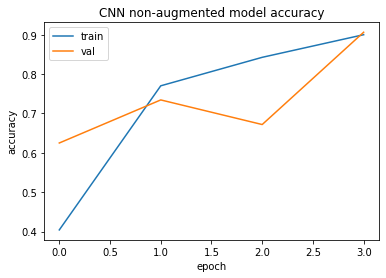

In [28]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN non-augmented model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

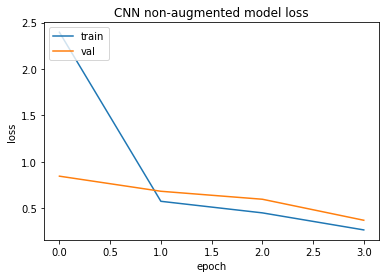

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN non-augmented model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

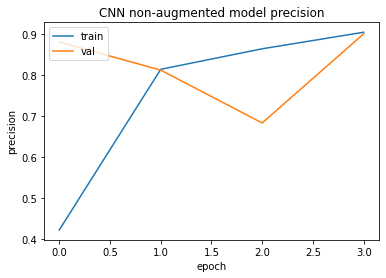

In [30]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('CNN non-augmented model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

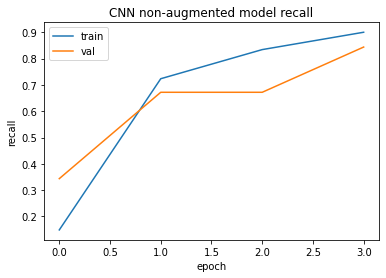

In [31]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('CNN non-augmented model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

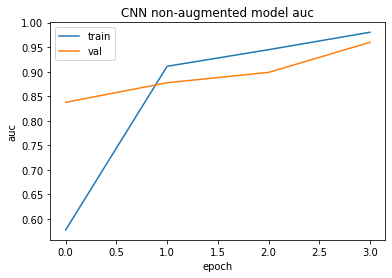

In [32]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('CNN non-augmented model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#Prediction with a model trained without augmentation
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


**Inference:** Model is able to predict the input correctly belonging to Type1 Disease. 

# Augmentation to training data, based on requirements provided

In [35]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.3,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)


In [36]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=[
                       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc'), 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                      ])

In [37]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

#class MyQualityThreshold(tf.keras.callbacks.Callback):
#  def __init__(self,cl):
#    super(MyQualityThreshold, self).__init__()
#    self.cl = cl
  
#  def on_epoch_end(self,epoch,logs=None):
#    testScore = logs['val_accuracy']
#    trainScore = logs['accuracy']


#    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
#      self.model.stop_training=True

In [38]:
# Fit the model after augmentation
batch_size=16
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.9)])

Epoch 1/10
15/15 [==============================] - 18s 1s/step - loss: 1.1507 - accuracy: 0.8553 - auc: 0.9246 - precision: 0.8553 - recall: 0.8553 - val_loss: 0.5075 - val_accuracy: 0.8750 - val_auc: 0.9451 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 2/10
15/15 [==============================] - 14s 954ms/step - loss: 0.1025 - accuracy: 0.9500 - auc: 0.9970 - precision: 0.9538 - recall: 0.9458 - val_loss: 0.2248 - val_accuracy: 0.9062 - val_auc: 0.9860 - val_precision: 0.9062 - val_recall: 0.9062
Epoch 3/10
15/15 [==============================] - 14s 946ms/step - loss: 0.1260 - accuracy: 0.9489 - auc: 0.9957 - precision: 0.9487 - recall: 0.9447 - val_loss: 0.4226 - val_accuracy: 0.8594 - val_auc: 0.9583 - val_precision: 0.8594 - val_recall: 0.8594
Epoch 4/10
15/15 [==============================] - 14s 949ms/step - loss: 0.0819 - accuracy: 0.9830 - auc: 0.9978 - precision: 0.9830 - recall: 0.9830 - val_loss: 0.2269 - val_accuracy: 0.9062 - val_auc: 0.9861 - val_precision: 0.9

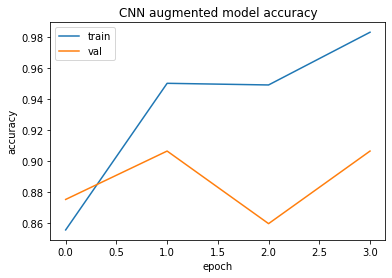

In [39]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN augmented model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

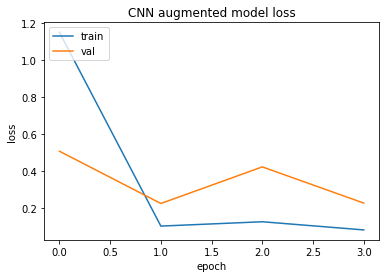

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN augmented model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

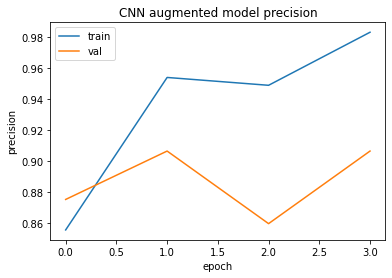

In [41]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('CNN augmented model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

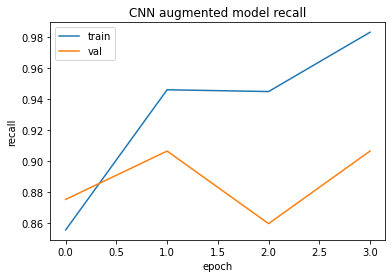

In [42]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('CNN augmented model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

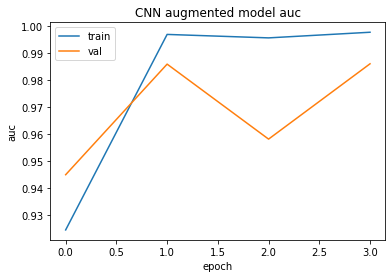

In [43]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('CNN augmented model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
#Prediction with model trained using augmentation
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


Inference: Model w/ augmented training data also able to predict the input test image correctly as Type1 disease. 

In [45]:
#Saving Model
model.save("LungsDiseaseDetector")

INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


Transfer learning using the ** CNN model architected with augmentation**

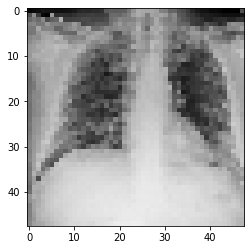

In [46]:
#Deployment Example
#Step1: Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [47]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myImageNPArray.shape

(48, 48, 3)

In [48]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [49]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)

In [50]:
prediction

array([[1., 0., 0.]], dtype=float32)

In [51]:
list(trainImageData.class_indices)[np.argmax(prediction)]

'Type 1 disease'

# **Inference**: CNN model with augmentation is able to predict the disease of input test image as Type 1 disease
Overfitting observed; Typical methods to deal w/ this are: 
- Change initializers, Regularization, Adding momentum in optimizers, Batch normalization, early stopping, reduce complexity of CNN and data augmentation. 
- Below will be included in this project: Data augmentation (Rotating, zoom, shear, flipping), Early stopping, batch normalization. 

# Part#2 - Transfer learning using mobile net:

In [52]:
import tensorflow as tf
from glob import glob

In [53]:
# Set the training path and validation path

train_path = 'data_Lungs/train/'
validation_path = 'data_Lungs/test/'

In [54]:
#Initialize Glob to interact with storage

image_files = glob(train_path +'/*/*.jp*g')
valid_image_files = glob(validation_path +'/*/*.jp*g')

In [55]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

In [56]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [57]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


mobnet = tf.keras.applications.mobilenet.MobileNet(input_shape=[48,48,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in mobnet.layers:
  layer.trainable=False #If Approach 1--- True else False

In [58]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [59]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    mobnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [60]:
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                         

In [61]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=[
                       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc'), 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                      ])

In [62]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [63]:
#Fit Model 
batch_size=16
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.9)])

Epoch 1/10
15/15 [==============================] - 16s 939ms/step - loss: 1.0736 - accuracy: 0.4596 - auc: 0.5948 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.1020 - val_accuracy: 0.3906 - val_auc: 0.5253 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 13s 856ms/step - loss: 1.0693 - accuracy: 0.4468 - auc: 0.6060 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0885 - val_accuracy: 0.4062 - val_auc: 0.5583 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 13s 836ms/step - loss: 1.0557 - accuracy: 0.4638 - auc: 0.6456 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0832 - val_accuracy: 0.4375 - val_auc: 0.5692 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 13s 849ms/step - loss: 1.0574 - accuracy: 0.4553 - auc: 0.6434 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0802 - 

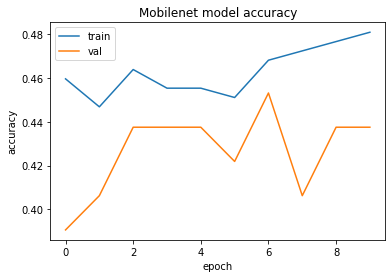

In [64]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Mobilenet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

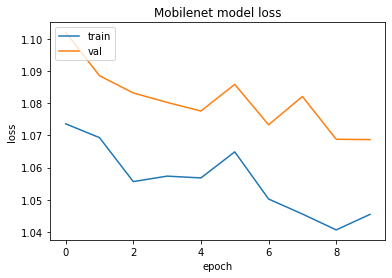

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mobilenet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

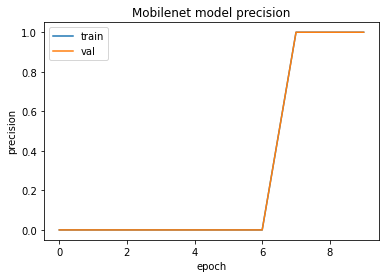

In [66]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Mobilenet model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

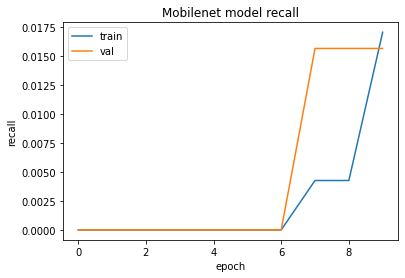

In [67]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Mobilenet model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

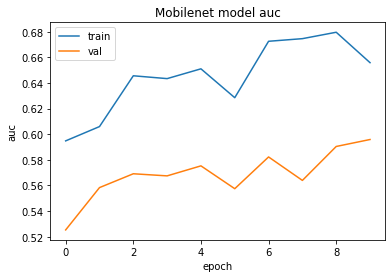

In [68]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Mobilenet model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [69]:
#Saving Model
model.save("LungsDetectorMobileNet")

INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


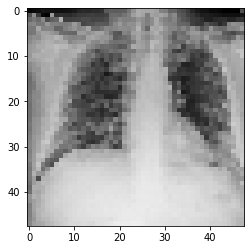

In [70]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [71]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(48, 48, 3)

In [72]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [73]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[0.4488792 , 0.28195247, 0.2691684 ]], dtype=float32)

In [74]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

**Inference:** Mobilenet Transfer Learning model also can predict the input test image as Type1 disease! 
- With lower batch sizes (< 16) there is convergence errors. With batch size ~32, it gives precision and recall = 0 both for train and test data. So, retained batch size of 16 for mobilenet learning modeling. 

# Part#3 - Transfer learning using Densenet:

In [75]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [76]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [77]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


densnet = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in densnet.layers:
  layer.trainable=False #If Approach 1--- True else False

In [78]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [79]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    densnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 150531    
                                                                 
Total params: 7,188,035
Trainable params: 150,531
Non-trainable params: 7,037,504
_________________________________________________________________


In [80]:
densnet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [81]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=[
                       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc'), 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                      ])

In [82]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [83]:
#Fit Model 
batch_size=7
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.9)])

Epoch 1/15
35/35 [==============================] - 70s 2s/step - loss: 8.8647 - accuracy: 0.6148 - auc: 0.7431 - precision: 0.6173 - recall: 0.6148 - val_loss: 5.9221 - val_accuracy: 0.6190 - val_auc: 0.7526 - val_precision: 0.6190 - val_recall: 0.6190
Epoch 2/15
35/35 [==============================] - 58s 2s/step - loss: 3.1224 - accuracy: 0.7664 - auc: 0.8755 - precision: 0.7664 - recall: 0.7664 - val_loss: 12.1547 - val_accuracy: 0.5714 - val_auc: 0.6616 - val_precision: 0.5714 - val_recall: 0.5714
Epoch 3/15
35/35 [==============================] - 61s 2s/step - loss: 2.4496 - accuracy: 0.8238 - auc: 0.8946 - precision: 0.8238 - recall: 0.8238 - val_loss: 0.6015 - val_accuracy: 0.9048 - val_auc: 0.9601 - val_precision: 0.9048 - val_recall: 0.9048
Epoch 4/15
35/35 [==============================] - 58s 2s/step - loss: 1.6770 - accuracy: 0.9016 - auc: 0.9432 - precision: 0.9016 - recall: 0.9016 - val_loss: 5.8064 - val_accuracy: 0.6984 - val_auc: 0.8006 - val_precision: 0.6984 - va

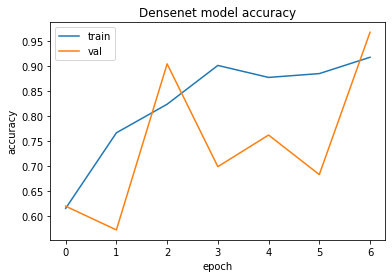

In [84]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Densenet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

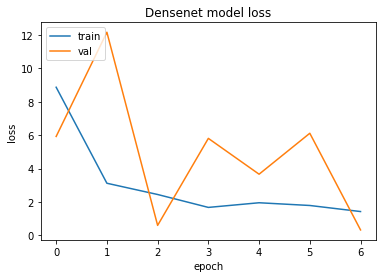

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Densenet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

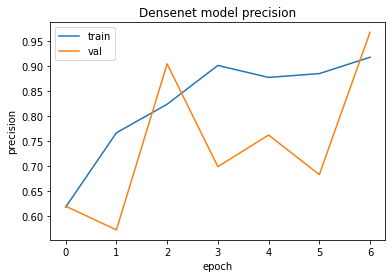

In [86]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Densenet model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

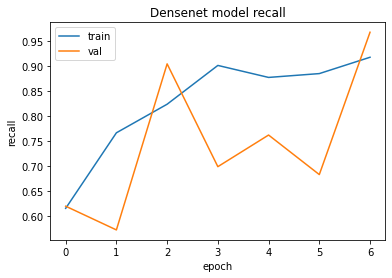

In [87]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Densenet model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

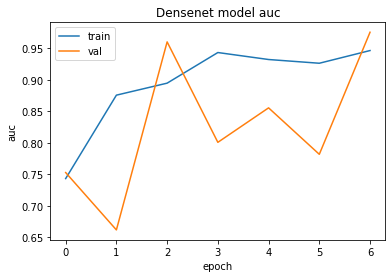

In [88]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Densenet model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
#Saving Model
model.save("LungsDetectorDenseNet")

INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


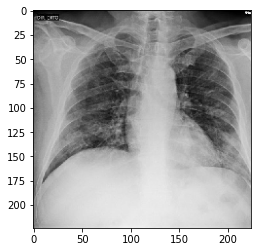

In [90]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(224, 224))
plt.imshow(imageToPredict)

In [91]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(224, 224, 3)

In [92]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 224, 224, 3)

In [93]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[1., 0., 0.]], dtype=float32)

In [94]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

**Inference:** 

Densenet is also able to predict the test image as right classification of disease Type1

#Summary / Comparison of prediction effectiveness between different ANN networks. 
* **4x models** were compared based on 10x Epochs max: 
  * CNN without Augmentation
  * CNN with Augmentation
  * MobileNet (Convolution layer - Pretrained)
  * DenseNet  (Convolution layer - Pretrained)
* **5x metrics** were used to compare models:
  * *Accuracy*: (How accurately model can classify - Higher the better)
  * *Precision*: (Reliability in classifying the model as positive - Higher the better)
  * *Recall*: (Higher the better - shows more positive samples can be detected)
  * *Loss*: (Imperfection in prediction - Lower the Better)
  * *ACU*: (Distinguish between positive & negative classes - Higher the Better)

**Note**: Since the X-Ray images though in RGB format were actually in grayscale, and hence whole analysis not repeated with both RGB and Grayscale modes. 

* **Conclusion**: 
  * All 4x models were able to predict right disease type based on test image provided.
  * **Rank#1: My CNN with Augmentation** gave best prediction based on all metrics; It gave almost perfect accuracy; Though it gave overfit, it wasn't overall not bad, and augmentation clearly helped training fit. 
  * **Rank#2: My CNN without Augmentation** gave next best prediction based on all metrics. Can see the gap due to missing augmentation. 
  * **Rank#3: DenseNet** came next; It utilises dense connections between layers, through Dense Blocks, where we connect all layers (with matching feature-map sizes) directly with each other. They alleviate the vanishing-gradient problem, strengthen feature propagation, encourage feature reuse, and substantially reduce the number of parameters. Accuracy, ACU, precision & recall were pretty high, but loss was higher. Training of convolution layers should improve results.
  * **Rank#4: MobileNet** came last; 
Image result for compare Mobilenet and densenet
MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks, but took maximum time for model fitting. Though precision was ~1, acccuracy was < 0.5 & recall < 0.02. Higher no: of epochs + training of convolution layers should improve results.  



